# 2. 해결과제 1 
## 격자별 데이터셋 생성

사용할 데이터들을 100x100 격자 기준으로 전처리하여 회귀 모델링에 사용할 수 있는 격자별 데이터셋을 만들었습니다.

사용한 데이터는 다음과 같습니다.  

- 데이터1: 주정차 단속 
- 데이터2: 격자별 어린이 교통사고 
- 데이터3: 차량등록 현황
- 데이터4: 격자별 총 인구수 
- 데이터5: 격자별 유소년 인구수 
- 데이터8: 유동인구 
- 데이터9: 어린이 보호구역
- 데이터10: 오산시 내 학교
- 데이터13: 오산시 내 어린이집/ 유치원
- 데이터15: 무인교통카메라
- 데이터16: 도로안전표지 
- 데이터17: 횡단보도
- 데이터18: 과속방지턱 
    * **외부 데이터 사용 - 공공데이터포털의 경기도 오산시 과속방지턱 데이터**
- 데이터19: 신호등
- 데이터20 : CCTV
- 데이터21: 인도
- 데이터22: 버스정류장
- 데이터23: 오산시 상세도로망
- 데이터24: 추정교통량
- 데이터25: 혼잡빈도강도
- 데이터26: 혼잡시간강도
- 데이터28: 격자별 건물 연면적 
- 데이터29: 체육시설 현황
- 데이터30: 학원 및 교습소 현황
- 외부데이터 : 교차로 데이터 
    * **외부 데이터 사용 - 표준노드링크 지능형교통체계관리시스템의 표준노드 데이터**
- 데이터34: 오산시 지적도 
 
  
    
  
  
   
     
     

**격자별로 전처리한 데이터는 다음과 같습니다.**


 - PSC_cnt : 주정차 단속 수
 - accident_cnt : 어린이 교통사고 수
 - val_pop : 총인구 수 
 - val_youth : 유소년 인구 수 
 - pl_0-5, pl_6-11, pl12-17, pl18-23 : 시간별 유동인구 
 - pl_mean, pl_var : 유동인구 평균과 표준편차 
 - S_zone_CCTV: 어린이 보호구역 cctv 설치대수
 - S_zone : 격자 내 어린이 보호구역 존재 여부
 - school_cnt : 초등학교 수
 - KDG_cnt : 유치원, 어린이집 시설 수
 - UCCTV_cnt : 무인 cctv 설치 개수
 - sign_cnt : 도로 표지 개수
 - CW_cnt : 횡단보도 개수
 - bump_cnt : 과속방지턱 개수 
 - TL_cnt : 신호등 개수
 - CCTV_cnt : cctv 대수 (방범용(A)와 도시공원(B)타입 제외)
 - SW_cnt : 인도 수
 - bus_cnt : 버스정류장 개수
 - val_area : 건물 연면적 
 - academy_cnt : 학원,교습소 및 체육시설 개수
 - node_cnt : 격자 내 교차로 개수 
 - road : 격자 내 도로 존재 여부




In [1]:
# 라이브러리 불러오기
import folium
import json
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
import os
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point
from tqdm import tqdm

In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기 
data1 = pd.read_csv("1.오산시_주정차단속(2018~2020).csv")
data2 = gpd.read_file("2.오산시_어린이교통사고_격자.geojson")
data3 = gpd.read_file("3.오산시_차량등록현황_격자.geojson")
data4 = gpd.read_file("4.오산시_연령별_거주인구격자(총인구).geojson")
data5 = gpd.read_file("5.오산시_연령별_거주인구격자(유소년).geojson")
data6 = gpd.read_file("6.오산시_연령별_거주인구격자(생산가능인구).geojson")
data7 = gpd.read_file("7.오산시_연령별_거주인구격자(고령).geojson")
data8 = pd.read_csv("8.오산시_유동인구(2019).csv")
data9 = pd.read_csv("9.오산시_어린이보호구역.csv")
data10 = pd.read_csv("10.오산시_학교위치정보.csv")
data11 = gpd.read_file("11.오산시_초등학교_통학구.geojson")
data12 = gpd.read_file("12.오산시_중학교_학군.geojson")
data13 = pd.read_csv("13.오산시_어린이집_유치원현황.csv")
data15 = pd.read_csv("15.오산시_무인교통단속카메라.csv")
data16 = pd.read_csv("16.오산시_도로안전표지표준데이터.csv")
data17 = gpd.read_file("17.오산시_횡단보도.geojson")
data18 = pd.read_csv("18.오산시_과속방지턱표준데이터.csv")
data19 = gpd.read_file("19.오산시_신호등.geojson")
data20 = pd.read_csv("20.오산시_CCTV설치현황.csv")
data21 = gpd.read_file("21.오산시_인도.geojson")
data22 = pd.read_csv("22.오산시_버스정류장.csv")
data23 = gpd.read_file("23.오산시_상세도로망_LV6.geojson")
data24 = pd.read_csv("24.평일_전일,시간대별_오산시_추정교통량_Level6.csv")
data25  = pd.read_csv("25.평일_전일_오산시_혼잡빈도강도_Level6.csv")
data26 = pd.read_csv("26.평일_전일_오산시_혼잡시간강도_Level6.csv")
data27 = gpd.read_file("27.오산시_도로명주소_건물.geojson")
data28 = gpd.read_file("28.오산시_건물연면적_격자.geojson")
data29 = pd.read_csv('29.오산시_체육시설현황.csv')
data30 = pd.read_csv("30.오산시_학원_및_교습소_현황.csv")
data33 = gpd.read_file('33.오산시_법정경계(읍면동).geojson')
data34 = gpd.read_file("34.오산시_지적도.geojson")

In [4]:
# 격자 데이터
data_gid = data2[['gid', 'geometry']]

## 데이터1 : 주정차 단속 
2018-2020년 기준 오산시 주차위반 데이터입니다.  
단속위치 좌표 기준으로 격자 내 몇 번의 주정차 단속이 있었는지 건수를 계산했습니다. 

In [5]:
data1 = pd.read_csv("1.오산시_주정차단속(2018~2020).csv")

In [6]:
data1.head()

,단속일자,단속위치,행정구역,스쿨존여부,단속위치_경도,단속위치_위도,단속종류
0,20181101,금암동 여계산로 부근,경기도 오산시 세교동,N,127.043462,37.170237,이동형CCTV단속
1,20181101,세교동 세마역로19번길,경기도 오산시 세교동,N,127.044770,37.181695,이동형CCTV단속
2,20181101,세교동 수목원로 부근,경기도 오산시 양산동,N,127.042200,37.186357,이동형CCTV단속
3,20181101,오산동 오산로272번길 부,경기도 오산시 원동,N,127.071732,37.150557,이동형CCTV단속
4,20181101,오산동 성호대로93번길,경기도 오산시 부산동,N,127.071757,37.150457,이동형CCTV단속


In [7]:
data1['PSC_cnt']=1
data1['단속위치_경도'] = data1['단속위치_경도'].astype(float)
data1['단속위치_위도'] = data1['단속위치_위도'].astype(float)
data1['point'] = data1.apply(lambda row : Point([row['단속위치_경도'], row['단속위치_위도']]), axis=1)
data1 = gpd.GeoDataFrame(data1, geometry='point')

In [8]:
PSC_list = []
for i in tqdm(range(data_gid.shape[0])):
    gid = data_gid['geometry'].iloc[i]
    cnt = data1['point'].within(gid).sum()
    PSC_list.append(cnt)

100%|██████████| 4510/4510 [20:43<00:00,  3.63it/s]


In [9]:
PSC_cnt = list(PSC_list)
result1 = pd.DataFrame()
result1['gid'] = data_gid['gid']
result1['PSC_cnt'] = PSC_cnt
data1 = result1

## 데이터2 : 어린이 교통사고

2010-2019년 기준 오산시 어린이 교통사고에 대한 100x100 격자 데이터입니다. 
##### 회귀 모형의 종속변수로 사용할 변수입니다.

In [10]:
data2.head()

,gid,accident_cnt,geometry
0,다사551085,0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."


In [11]:
data2 = data2[['gid', 'accident_cnt']]

## 데이터 3 : 차량등록 현황
격자 기준 오산시 차량등록 현황 데이터입니다. 

In [12]:
data3 = gpd.read_file("3.오산시_차량등록현황_격자.geojson")

In [13]:
data3.head()

,gid,car_cnt,geometry
0,다사551085,0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."


In [14]:
data3 = data3[['gid', 'car_cnt']]

## 데이터 4 : 인구 격자 (총 인구수)
격자 기준 2020년 오산시 총 인구수 데이터입니다. 

In [15]:
data4 = gpd.read_file("4.오산시_연령별_거주인구격자(총인구).geojson")

In [16]:
data4.head()

,gid,val,geometry
0,다사551085,NaN,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,NaN,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,NaN,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,NaN,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,NaN,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."


In [17]:
data4 = data4.rename({'val':'val_pop'},axis=1)
data4 = data4[['gid', 'val_pop']]

## 데이터 5 : 인구격자 (유소년 인구수)
격자 기준 2020년 오산시 유소년 인구수 데이터입니다.   
어린이 교통사고의 분석 대상이므로 연령별 데이터에서 유소년 인구수만 선택하여 사용하였습니다. 

In [18]:
data5.head()

,gid,val,geometry
0,다사551085,NaN,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,NaN,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,NaN,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,NaN,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,NaN,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."


In [19]:
data5 = data5.rename({'val':'val_youth'},axis=1)
data5 = data5[['gid', 'val_youth']]

## 데이터8 : 오산시 유동인구
2019년 기준 오산시 월별 시간별 유동인구 50x50 격자 데이터입니다.  좌표 기준으로 격자 내 유동인구 수를 계산했습니다.  

##### 유동인구 데이터는 1시간 단위로 전체 시간대가  제시되어 있으나 가까운 시간대의 유동인구의 양상이 매우 비슷하므로 크게 새벽(0-5시), 오전(6-11시), 오후(12-17시), 저녁(18-23시) 시간대별 평균과 전체 평균과 분산을 구했습니다. 

In [20]:
data8 = pd.read_csv("8.오산시_유동인구(2019).csv")

In [21]:
data8.head()

,STD_YM,lon,lat,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201901,126.995145,37.176703,0.08,0.05,0.04,0.04,0.08,0.27,0.80,...,0.69,0.76,0.95,0.91,0.70,0.43,0.34,0.22,0.14,0.10
1,201901,126.995142,37.177153,0.06,0.04,0.03,0.03,0.06,0.19,0.56,...,0.54,0.58,0.69,0.66,0.51,0.33,0.26,0.17,0.11,0.08
2,201901,126.995714,37.175804,0.00,0.00,0.00,0.00,0.00,0.01,0.03,...,0.04,0.04,0.05,0.05,0.03,0.02,0.02,0.01,0.01,0.00
3,201901,126.995711,37.176254,0.05,0.03,0.02,0.03,0.05,0.19,0.56,...,0.48,0.53,0.65,0.63,0.48,0.29,0.23,0.15,0.10,0.07
4,201901,126.995708,37.176705,0.02,0.01,0.01,0.01,0.02,0.07,0.18,...,0.19,0.20,0.23,0.22,0.17,0.11,0.09,0.06,0.04,0.03


In [22]:
# 시간대별 평균
data8['pl_0_5'] = data8.iloc[:,3:9].mean(axis=1) 
data8['pl_6_11'] = data8.iloc[:, 9:15].mean(axis=1)
data8['pl_12_17'] = data8.iloc[:, 15:21].mean(axis=1)
data8['pl_18_23'] = data8.iloc[:, 21:27].mean(axis=1)

# 유동인구 전 시간대 평균, 표준편차
data8['pl_mean'] = data8.iloc[:,3:27].mean(axis=1)
data8['pl_var'] = data8.iloc[:, 3:27].std(axis=1)

In [23]:
data8 = pd.DataFrame(data8.groupby(['lon', 'lat']).mean())
data8.reset_index(inplace=True)

In [24]:
data8['lon'] = data8['lon'].astype(float)
data8['lat'] = data8['lat'].astype(float)
data8['point'] = data8.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
data8 = gpd.GeoDataFrame(data8, geometry='point')

In [25]:
gid_list = []
for i in tqdm(range(data8.shape[0])):
    point = data8['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data8['gid'] = gid_list

100%|██████████| 12402/12402 [04:14<00:00, 48.81it/s]


In [26]:
result8 = pd.DataFrame(data8.groupby(['gid']).mean())
result8.reset_index(inplace=True)
data8 = result8[['gid', 'pl_0_5', 'pl_6_11', 'pl_12_17','pl_18_23','pl_mean', 'pl_var' ]]

In [27]:
data8.head()

,gid,pl_0_5,pl_6_11,pl_12_17,pl_18_23,pl_mean,pl_var
0,다사551086,0.015667,0.132417,0.135000,0.079750,0.090708,0.061022
1,다사551087,0.058532,0.560407,0.525268,0.283125,0.356833,0.241007
2,다사551088,0.062917,0.532083,0.539792,0.271250,0.351510,0.228383
3,다사552085,0.000972,0.025000,0.026528,0.008056,0.015139,0.014127
4,다사552086,0.030023,0.272847,0.255185,0.134097,0.173038,0.115769


## 데이터9 : 어린이 보호구역
오산시 어린이보호구역 정보 데이터입니다.

In [28]:
data9 = pd.read_csv("9.오산시_어린이보호구역.csv")

In [29]:
data9.head()

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도
0,특수학교,성심학교,N,0,25,127.017521,37.176762
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197
3,초등학교,대호초등학교,Y,3,12,127.057889,37.159106
4,초등학교,매홀초등학교,Y,2,6,127.063282,37.162749


어린이 보호구역이 좌표 기준으로 제시되어 있으나 정확한 어린이 보호구역을 나타내기 위해선 지정된 도로를 고려해야 한다고 판단하여 **QGIS 툴을 활용하여 어린이 보호구역 중심 좌표 100m 버퍼 안에 들어가는 도로를 선택한 새로운 파일** 생성했습니다. 

In [30]:
# QGIS로 전처리한 어린이보호구역 100m 버퍼 내 도로 
S_zone = gpd.read_file('지적도_교차영역도로_100원.geojson', encoding = 'etf-8')

In [31]:
S_zone.head()

,PNU,JIBUN,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,geometry
0,4137011100101510002,151-2 도,유치원,동탄우리유치원,Y,1,4,127.060252,37.196997,"MULTIPOLYGON (((127.06077 37.19778, 127.06070 ..."
1,4137011100101510002,151-2 도,어린이집,베스트어린이집,Y,1,3,127.061423,37.197877,"MULTIPOLYGON (((127.06091 37.19805, 127.06086 ..."
2,4137011100101510003,151-3 도,유치원,동탄우리유치원,Y,1,4,127.060252,37.196997,"MULTIPOLYGON (((127.06064 37.19770, 127.06064 ..."
3,4137011100101510003,151-3 도,어린이집,베스트어린이집,Y,1,3,127.061423,37.197877,"MULTIPOLYGON (((127.06064 37.19770, 127.06064 ..."
4,4137011100101510004,151-4 도,유치원,동탄우리유치원,Y,1,4,127.060252,37.196997,"MULTIPOLYGON (((127.06055 37.19781, 127.06056 ..."


In [32]:
S_zone_list = []
for i in tqdm(range(data_gid.shape[0])):
    gid = data_gid['geometry'].iloc[i]
    cnt = S_zone['geometry'].intersects(gid).sum()
    S_zone_list.append(cnt)

100%|██████████| 4510/4510 [00:31<00:00, 143.58it/s]


In [33]:
S_zone = list(S_zone_list)
gid = list(data3['gid'])
result9 = pd.DataFrame()
result9['gid'] = gid
result9['S_zone'] = S_zone
data9_1 = result9

In [34]:
#격자 내 어린이 보호구역 존재 여부(y/n) 변수
data9_1.loc[data9_1['S_zone']>0, ['S_zone']] = 1

In [35]:
data9_1.head()

,gid,S_zone
0,다사551085,0
1,다사551086,0
2,다사551087,0
3,다사551088,0
4,다사552085,0


In [36]:
data9['보호구역_경도'] = data9['보호구역_경도'].astype(float)
data9['보호구역_위도'] = data9['보호구역_위도'].astype(float)
data9['point'] = data9.apply(lambda row : Point([row['보호구역_경도'], row['보호구역_위도']]), axis=1)
data9 = gpd.GeoDataFrame(data9, geometry='point')

In [37]:
gid_list = []
for i in tqdm(range(data9.shape[0])):
    point = data9['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data9['gid'] = gid_list

100%|██████████| 91/91 [00:01<00:00, 48.53it/s]


In [38]:
result9 = pd.DataFrame(data9.drop(['보호구역_경도','보호구역_위도','시설종류','시설명','보호구역도로폭'],axis =1))

In [39]:
result9 = result9.groupby(['gid']).sum()
result9.reset_index(inplace=True)

In [40]:
result9 = result9.rename({'CCTV설치대수':'S_Zone_CCTV'},axis=1)
data9 = result9

In [41]:
# 어린이보호구역 내 cctv 설치대수 
data9.head()

,gid,S_Zone_CCTV
0,다사571087,0
1,다사579109,1
2,다사580079,3
3,다사584110,2
4,다사586100,1


## 데이터10 : 오산시 학교
오산시 초,중,고등학교 현황 데이터입니다.어린이 교통사고 예측을 위한 데이터이므로 초등학교 데이터만 필터링하여 사용하였습니다.  
좌표 기준으로 격자 내 학교 개수를 계산했습니다. 

In [42]:
data10 = pd.read_csv("10.오산시_학교위치정보.csv")

In [43]:
data10.head()

,학교구분,학교명,학교위치_경도,학교위치_위도
0,초등학교,원동초등학교,127.069699,37.135168
1,초등학교,운산초등학교,127.077414,37.152500
2,초등학교,화성초등학교,127.068858,37.164615
3,중학교,대호중학교,127.056978,37.161864
4,중학교,매홀중학교,127.068500,37.167778


In [44]:
# 초등학교만 필터링
data10 = data10[data10['학교구분']=='초등학교'];data10.head()

,학교구분,학교명,학교위치_경도,학교위치_위도
0,초등학교,원동초등학교,127.069699,37.135168
1,초등학교,운산초등학교,127.077414,37.152500
2,초등학교,화성초등학교,127.068858,37.164615
12,초등학교,가수초등학교,127.047749,37.147919
13,초등학교,다온초등학교,127.090752,37.151698


In [45]:
data10['school_cnt'] = 1
data10['학교위치_경도'] = data10['학교위치_경도'].astype(float)
data10['학교위치_위도'] = data10['학교위치_위도'].astype(float)
data10['point'] = data10.apply(lambda row : Point([row['학교위치_경도'], row['학교위치_위도']]), axis=1)

In [46]:
gid_list = []
for i in tqdm(range(data10.shape[0])):
    point = data10['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data10['gid'] = gid_list

100%|██████████| 24/24 [00:00<00:00, 47.98it/s]


In [47]:
result10 = data10.drop(['학교구분', '학교명', '학교위치_경도', '학교위치_위도'],axis=1)
result10 = result10.groupby(['gid']).sum()
result10.reset_index(inplace=True)
data10 = result10

In [48]:
data10.head()

,gid,school_cnt
0,다사584110,1
1,다사591095,1
2,다사595089,1
3,다사596084,1
4,다사598055,1


In [49]:
sum(data10.school_cnt) 

24

## 데이터 13 : 어린이집 & 유치원
오산시 어린이집 및 유치원 위치 정보 데이터입니다.  
마찬가지로 좌표 기준으로 격자 내 어린이집과 유치원 개수를 계산했습니다. 

In [50]:
data13 = pd.read_csv("13.오산시_어린이집_유치원현황.csv")

In [51]:
data13.tail()

,시설구분,시설타입,시설명,시설위치_경도,시설위치_위도
302,유치원,공립,매홀초등학교병설유치원,127.063587,37.162365
303,유치원,공립,문시초등학교병설유치원,127.045862,37.174141
304,유치원,공립,세교유치원,127.044332,37.177051
305,유치원,공립,수청초등학교병설유치원,127.055667,37.170668
306,유치원,공립,오산다온유치원,127.090752,37.151698


In [52]:
data13['시설위치_경도'] = data13['시설위치_경도'].astype(float)
data13['시설위치_위도'] = data13['시설위치_위도'].astype(float)
data13['point'] = data13.apply(lambda row : Point([row['시설위치_경도'], row['시설위치_위도']]), axis=1)
data13 = gpd.GeoDataFrame(data13, geometry='point')

In [53]:
gid_list = []
for i in tqdm(range(data13.shape[0])):
    point = data13['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data13['gid'] = gid_list

100%|██████████| 307/307 [00:06<00:00, 46.44it/s]


In [54]:
data13['KDG_cnt']=1
result13 = data13.drop(['시설위치_경도' ,'시설위치_위도'],axis=1)
result13 = result13.groupby(['gid']).sum()
result13.reset_index(inplace=True)
data13 =result13

In [55]:
data13.head()

,gid,KDG_cnt
0,다사575106,1
1,다사578077,1
2,다사579077,2
3,다사579108,1
4,다사580077,1


## 데이터 15 : 무인 교통단속카메라
2020년 9월 기준 오산시 무인교통단속카메라 정보 데이터입니다.  
설치위치 좌표 기준으로 격자 내 단속카메라 개수를 계산했습니다. 

In [56]:
data15.head()

,도로노선명,도로노선방향,설치장소명,단속구분,설치위치_경도,설치위치_위도
0,궐리사로,양방향,궐동-법원앞(법원사거리),불법주정차,127.059357,37.159313
1,역광장로,양방향,원동-오산역광장,불법주정차,127.067796,37.145409
2,궐리사로,양방향,궐동-제일하이빌,불법주정차,127.062386,37.159198
3,궐리사로,양방향,궐리사 주차장 앞,불법주정차,127.061920,37.158559
4,운암로,양방향,부산동-운천초교 입구,불법주정차,127.077991,37.156216


In [57]:
data15['UCCTV_cnt']=1
data15['설치위치_경도'] = data15['설치위치_경도'].astype(float)
data15['설치위치_위도'] = data15['설치위치_위도'].astype(float)
data15['point'] = data15.apply(lambda row : Point([row['설치위치_경도'], row['설치위치_위도']]), axis=1)
data15 = gpd.GeoDataFrame(data15, geometry='point')

In [58]:
gid_list = []
for i in tqdm(range(data15.shape[0])):
    point = data15['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data15['gid'] = gid_list

100%|██████████| 112/112 [00:02<00:00, 48.68it/s]


In [59]:
result15 = data15.drop(['설치위치_경도','설치위치_위도'],axis=1)
result15 = result15.groupby(['gid']).sum()
result15.reset_index(inplace=True)
data15 =result15

In [60]:
data15.head()

,gid,UCCTV_cnt
0,다사576109,1
1,다사579079,1
2,다사580080,1
3,다사581081,1
4,다사591095,1


## 데이터16 : 도로안전표지 데이터
2020년 9월 기준 오산시 도로안전표지 정보 데이터입니다.    
마찬가지로 좌표 기준으로 격자 내 표지 개수를 계산했습니다. 

In [61]:
data16 = pd.read_csv("16.오산시_도로안전표지표준데이터.csv")

In [62]:
data16.head()

,표지일련번호,표지종별,lon,lat
0,ER-400[봉담동탄고속도로]-상-60,2방향예고표지,127.069227,37.182663
1,NR-1[경기대로]-하-1982,시/군계표지,127.040826,37.197859
2,UR(오산시)-16[남부대로]-상-5,3방향도로명예고표지,127.070216,37.135929
3,UR(오산시)-16[남부대로]-하-3,3방향표지,127.064316,37.135531
4,UR(오산시)-16[남부대로]-하-4,3방향예고표지,127.051717,37.134248


In [63]:
data16['sign_cnt']=1
data16['lon'] = data16['lon'].astype(float)
data16['lat'] = data16['lat'].astype(float)
data16['point'] = data16.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
data16 = gpd.GeoDataFrame(data16, geometry='point')

In [64]:
gid_list = []
for i in tqdm(range(data16.shape[0])):
    point = data16['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data16['gid'] = gid_list

100%|██████████| 831/831 [00:16<00:00, 48.89it/s]


In [65]:
result16 = data16.groupby(['gid']).sum()
result16.reset_index(inplace=True)
data16 = result16
data16 = data16[['gid', 'sign_cnt']]

In [66]:
data16.head()

,gid,sign_cnt
0,다사553086,1
1,다사554085,1
2,다사554086,2
3,다사554088,2
4,다사555086,1


## 데이터17 : 횡단보도
2020년 9월 기준 오산시 횡단보도 위치 정보 데이터입니다.  
polygon 형태이므로 격자와 횡단보도 polygon이 겹치는 경우를 격자 별로 계산했습니다. 

In [67]:
data17 = gpd.read_file("17.오산시_횡단보도.geojson")

In [68]:
data17.head()

,OBJECTID,geometry
0,2,"MULTIPOLYGON (((127.06170 37.15704, 127.06178 ..."
1,3,"MULTIPOLYGON (((127.03174 37.19499, 127.03176 ..."
2,4,"MULTIPOLYGON (((127.05525 37.15645, 127.05533 ..."
3,5,"MULTIPOLYGON (((127.04935 37.13434, 127.04939 ..."
4,6,"MULTIPOLYGON (((127.06216 37.14973, 127.06228 ..."


In [69]:
CW_list = []
for i in tqdm(range(data_gid.shape[0])):
    gid = data_gid['geometry'].iloc[i]
    cnt = data17['geometry'].intersects(gid).sum()
    CW_list.append(cnt)

100%|██████████| 4510/4510 [00:26<00:00, 170.79it/s]


In [70]:
CW_cnt = list(CW_list)
gid = list(data3['gid'])
result17 = pd.DataFrame()
result17['gid'] = gid
result17['CW_cnt'] = CW_cnt
data17 = result17

In [71]:
data17.head()

,gid,CW_cnt
0,다사551085,0
1,다사551086,0
2,다사551087,0
3,다사551088,0
4,다사552085,0


## 데이터18 : 과속방지턱

주어진 과속방지턱 정보 데이터가 적어 그대로 사용하기에는 부족하다고 판단하여 외부데이터를 사용했습니다.   
***공공데이터포털에서 제공하는 오산시 과속방지턱 데이터 사용*** 

In [72]:
# 과속방지턱 데이터 개수 
data18.shape[0]

29

In [73]:
# 외부데이터 사용 - 공공데이터포털 제공 오산시 과속방지턱 데이터
data18 = pd.read_csv("오산시 과속방지턱_LOCALDATA.csv")

In [74]:
data18.head(3)

,번호,과속방지턱관리번호,도로명,시도명,시군구명,소재지도로명주소,소재지지번주소,설치장소,과속방지턱재료,과속방지턱형태구분,...,도로유형구분,규격여부,위도,경도,보차분리여부,연속형여부,과속방지턱설치연도,관리기관명,관리기관전화번호,데이터기준일자
0,1,856,성호대로,경기도,오산시,NaN,성호대로,경기대로281번길 19 앞,아스팔트 콘크리트,원호형,...,소로,N,37.149468,127.072481,N,N,NaN,경기도 오산시청,031-8036-7702,2020-12-09
1,2,857,경기대로,경기도,오산시,NaN,경기대로,동부삼환아파트 101동 원동두산아파트 102동 사이 도로,아스팔트 콘크리트,원호형,...,일반,Y,37.133724,127.069349,Y,N,NaN,경기도 오산시청,031-8036-7702,2020-12-09
2,3,858,경기대로,경기도,오산시,NaN,경기대로,동부삼환아파트 102동 원동두산아파트 101동 사이 도로,아스팔트 콘크리트,원호형,...,일반,Y,37.133742,127.070097,Y,N,NaN,경기도 오산시청,031-8036-7702,2020-12-09


In [75]:
data18['bump_cnt']=1
data18['경도'] = data18['경도'].astype(float)
data18['위도'] = data18['위도'].astype(float)
data18['point'] = data18.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
data18 = gpd.GeoDataFrame(data18, geometry='point')

In [76]:
gid_list = []
for i in tqdm(range(data18.shape[0])):
    point = data19['geometry'].iloc[i]
    if data_gid['geometry'].contains(point).sum() == 0:
        g1 = "Na"
    else :
        g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
        g1 = g.iloc[0]
    gid_list.append(g1)
data18['gid'] = gid_list

100%|██████████| 985/985 [00:41<00:00, 23.90it/s]


In [77]:
result18 = data18[['bump_cnt', 'gid']].groupby(['gid']).sum()
result18.reset_index(inplace=True)
data18 =result18

In [78]:
data18.head()

,gid,bump_cnt
0,Na,2
1,다사581070,1
2,다사581090,4
3,다사581109,1
4,다사583070,2


## 데이터19 : 신호등
2020년 9월 기준 오산시 신호등 위치 정보 데이터입니다.  
좌표 기준으로 격자 내 신호등 개수를 계산했습니다. 

In [79]:
data19 = gpd.read_file("19.오산시_신호등.geojson")

In [80]:
data19.head()

,OBJECTID,geometry
0,1,POINT (127.07160 37.14407)
1,2,POINT (127.08149 37.12849)
2,3,POINT (127.03978 37.16155)
3,4,POINT (127.03999 37.16168)
4,5,POINT (127.07838 37.14296)


In [81]:
gid_list = []
for i in tqdm(range(data19.shape[0])):
    point = data19['geometry'].iloc[i]
    if data_gid['geometry'].contains(point).sum() == 0:
        g1 = "Na"
    else :
        g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
        g1 = g.iloc[0]
    gid_list.append(g1)
data19['gid'] = gid_list

100%|██████████| 1498/1498 [01:02<00:00, 23.95it/s]


In [82]:
data19['TL_cnt']=1
result19 = data19[['TL_cnt', 'gid']].groupby(['gid']).sum()
result19.reset_index(inplace=True)
data19 =result19

In [83]:
data19.head()

,gid,TL_cnt
0,Na,2
1,다사577084,1
2,다사578084,3
3,다사578087,4
4,다사578088,2


## 데이터 20 : CCTV
오산시 방범 CCTV 설치현황 정보 데이터입니다.   
어린이 교통사고와 관련있는 유형코드 C(어린이보호)와 E(과속단속), D(차량방범), BC(도시공원, 어린이보호) CCTV만 필터링하여 사용했습니다.  
설치위치 좌표 기준으로 격자 내 CCTV 개수를 계산했습니다. 

In [84]:
data20 = pd.read_csv("20.오산시_CCTV설치현황.csv")

In [85]:
# A와 B 타입 CCTV 필터링 
data20_CDE =data20[(data20['CCTV 유형코드']!='A')&(data20['CCTV 유형코드']!='B')]
data20_CDE.head()

,CCTV 유형코드,설치위치_도로명주소,설치위치_위도,설치위치_경도
2,C,성호대로93번길 26,37.151167,127.071677
7,C,성산새싹길 13,37.150370,127.065719
15,C,현충로72번길 24,37.160448,127.073239
17,C,성호새싹길 8,37.149657,127.070278
22,C,대원로29번길 16,37.147547,127.071512


In [86]:
data20_CDE['CCTV_cnt']=1
data20_CDE['설치위치_경도'] = data20_CDE['설치위치_경도'].astype(float)
data20_CDE['설치위치_위도'] = data20_CDE['설치위치_위도'].astype(float)
data20_CDE['point'] = data20_CDE.apply(lambda row : Point([row['설치위치_경도'], row['설치위치_위도']]), axis=1)
data20_CDE = gpd.GeoDataFrame(data20_CDE, geometry='point')

In [87]:
data20_CDE.head()

,CCTV 유형코드,설치위치_도로명주소,설치위치_위도,설치위치_경도,CCTV_cnt,point
2,C,성호대로93번길 26,37.151167,127.071677,1,POINT (127.07168 37.15117)
7,C,성산새싹길 13,37.150370,127.065719,1,POINT (127.06572 37.15037)
15,C,현충로72번길 24,37.160448,127.073239,1,POINT (127.07324 37.16045)
17,C,성호새싹길 8,37.149657,127.070278,1,POINT (127.07028 37.14966)
22,C,대원로29번길 16,37.147547,127.071512,1,POINT (127.07151 37.14755)


In [88]:
gid_list = []
for i in tqdm(range(data20_CDE.shape[0])):
    point = data20_CDE['point'].iloc[i]
    if data_gid['geometry'].contains(point).sum() == 0:
        g1 = "Na"
    else :
        g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
        g1 = g.iloc[0]
    gid_list.append(g1)
data20_CDE['gid'] = gid_list

100%|██████████| 139/139 [00:05<00:00, 25.40it/s]


In [89]:
problem = data20_CDE[data20_CDE['gid']=="Na"]
problem

,CCTV 유형코드,설치위치_도로명주소,설치위치_위도,설치위치_경도,CCTV_cnt,point,gid
168,C,수청로 22,37.172180,172.058905,1,POINT (172.059 37.172),Na
557,E,다온초,127.090748,37.150892,1,POINT (37.151 127.091),Na
558,E,다온초,127.090748,37.150892,1,POINT (37.151 127.091),Na
559,E,오산숲유치원,127.083997,37.148336,1,POINT (37.148 127.084),Na
560,E,대호초,127.057906,37.159936,1,POINT (37.160 127.058),Na
561,E,성산초,127.065567,37.149489,1,POINT (37.149 127.066),Na
562,E,성호초,127.070001,37.149096,1,POINT (37.149 127.070),Na
563,E,대원초,127.072728,37.131781,1,POINT (37.132 127.073),Na
564,E,원일초,127.071237,37.139445,1,POINT (37.139 127.071),Na
565,E,운천초,127.078048,37.156239,1,POINT (37.156 127.078),Na


In [90]:
lon = list(problem['설치위치_위도'])
lat = list(problem['설치위치_경도'])
problem['설치위치_경도'] = lon
problem['설치위치_위도'] = lat

In [91]:
problem['설치위치_위도'] = lat
problem['설치위치_경도'] = lon

In [92]:
problem['point'] = problem.apply(lambda row : Point([row['설치위치_경도'], row['설치위치_위도']]), axis=1)
gid_list = []
for i in tqdm(range(problem.shape[0])):
    point = data20_CDE['point'].iloc[i]
    if data_gid['geometry'].contains(point).sum() == 0:
        g1 = "Na"
    else :
        g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
        g1 = g.iloc[0]
    gid_list.append(g1)
problem['gid'] = gid_list

100%|██████████| 11/11 [00:00<00:00, 21.22it/s]


In [93]:
result20 = pd.concat([data20_CDE[['gid', 'CCTV_cnt']], problem[['gid', 'CCTV_cnt']]])
result20 = result20.groupby(['gid']).sum()
result20.reset_index(inplace=True)
data20 = result20

In [94]:
data20.head()

,gid,CCTV_cnt
0,Na,11
1,다사571090,1
2,다사578108,1
3,다사580079,1
4,다사580080,1


## 데이터21 : 인도 
오산시 인도 현황 데이터입니다.  
linestring 형태의 데이터로 격자와 인도 linestring이 겹치는 경우를 격자별로 계산했습니다.

In [95]:
data21 = gpd.read_file("21.오산시_인도.geojson")

In [96]:
data21.head()

,UFID,QUAL,BYYN,KIND,geometry
0,TRN0400000002N7T0,SWQ003,BYC001,SWK001,"MULTILINESTRING ((127.05144 37.14183, 127.0514..."
1,TRN0400000002N79G,SWQ003,BYC001,SWK001,"MULTILINESTRING ((127.04907 37.14108, 127.0490..."
2,TRN0400000002N7LS,SWQ003,BYC001,SWK001,"MULTILINESTRING ((127.05210 37.14163, 127.0521..."
3,TRN0400000002NAR1,SWQ001,BYC001,SWK001,"MULTILINESTRING ((127.07471 37.14870, 127.0747..."
4,TRN0400000003E7DC,SWQ001,BYC001,SWK001,"MULTILINESTRING ((127.07466 37.14988, 127.0746..."


In [97]:
SW_list = []
for i in tqdm(range(data_gid.shape[0])):
    gid = data_gid['geometry'].iloc[i]
    cnt = data21['geometry'].intersects(gid).sum()
    SW_list.append(cnt)

100%|██████████| 4510/4510 [00:31<00:00, 145.37it/s]


In [98]:
SW_cnt = list(SW_list)
gid = list(data3['gid'])
result21 = pd.DataFrame()
result21['gid'] = gid
result21['SW_cnt'] = SW_cnt
data21 = result21

In [99]:
data21.head()

,gid,SW_cnt
0,다사551085,0
1,다사551086,0
2,다사551087,0
3,다사551088,0
4,다사552085,0


## 데이터 22 : 버스정류장
오산시 버스정류장 현황 데이터입니다.  
정류장 위치 좌표 기준으로 격자 내 버스정류장 수를 계산했습니다.  

In [100]:
data22 = pd.read_csv("22.오산시_버스정류장.csv")

In [101]:
data22.head()

,정류장 ID,정류장명,정류장 위치_경도,정류장 위치_위도
0,223000095,오산시티자이1.2단지,127.091033,37.149983
1,223000124,재래시장앞,127.068700,37.152717
2,223000290,솔매마을,127.026650,37.178833
3,223000289,솔매마을,127.026617,37.178933
4,223000306,죽미마을입구,127.046117,37.178217


In [102]:
data22['bus_cnt']=1
data22['정류장 위치_경도'] = data22['정류장 위치_경도'].astype(float)
data22['정류장 위치_위도'] = data22['정류장 위치_위도'].astype(float)
data22['point'] = data22.apply(lambda row : Point([row['정류장 위치_경도'], row['정류장 위치_위도']]), axis=1)
data22 = gpd.GeoDataFrame(data22, geometry='point')

In [103]:
gid_list = []
for i in tqdm(range(data22.shape[0])):
    point = data22['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data22['gid'] = gid_list

100%|██████████| 412/412 [00:08<00:00, 47.16it/s]


In [104]:
result22 = data22[['bus_cnt', 'gid']].groupby(['gid']).sum()
result22.reset_index(inplace=True)
data22 =result22

In [105]:
data22.head()

,gid,bus_cnt
0,다사554087,1
1,다사555087,1
2,다사562083,2
3,다사564084,1
4,다사564101,1


## 데이터23 : 오산시 상세 도로망
2018년 기준 오산시 전역 도로 데이터입니다.    
도로의 link id를 기준으로 아래의 추정교통량, 혼잡빈도강도, 혼잡시간강도 데이터를 병합하여 도로별 데이터셋을 만들었습니다. 

In [106]:
data23 = gpd.read_file("23.오산시_상세도로망_LV6.geojson")

In [107]:
## 보행 중 사고만 고려하기 위해 고속도로 데이터 제외 
data23 = data23[(data23['road_rank']!="101")&(data23['road_rank']!="108")]
data23 = data23[['link_id', 'geometry']]
data23['link_id'] = data23['link_id'].astype(float)

In [108]:
data23.head()

,link_id,geometry
8,571200632.0,"MULTILINESTRING ((127.06151 37.14928, 127.0615..."
9,571200633.0,"MULTILINESTRING ((127.06096 37.14943, 127.0611..."
10,571200680.0,"MULTILINESTRING ((127.06835 37.15484, 127.0682..."
11,571200686.0,"MULTILINESTRING ((127.07356 37.14637, 127.0729..."
12,571200693.0,"MULTILINESTRING ((127.07215 37.13379, 127.0725..."


## 데이터24 : 추정 교통량
2018년 기준 오산시 평일 일별, 시간대별 추정 교통량 데이터입니다.  


In [109]:
data24 = pd.read_csv("24.평일_전일,시간대별_오산시_추정교통량_Level6.csv")

In [110]:
data24.head()

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,전체 추정교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량
0,57137697901,101,0.093,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,268.55,193.43,11.99,63.13
1,57135249601,101,0.324,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,21.98,15.48,0.75,5.74
2,57135250601,101,0.333,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,15.77,9.55,1.50,4.73
3,57137696601,101,0.372,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,179.55,135.99,5.22,38.35
4,57137697701,101,0.667,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,267.91,192.96,11.96,62.99


In [111]:
data24.columns

Index(['상세도로망_LinkID', '도로등급', '링크길이', '도로명', '시도명', '시군구명', '읍면동명', '시간적범위',
       '평일주말', '전체 추정교통량', '승용차 추정교통량', '버스 추정교통량', '화물차 추정교통량'],
      dtype='object')

In [112]:
## LinkID를 9자리로 만들어 주기 -- 뒤에 두자리는 상행, 하행을 뜻함
id11 = list(data24['상세도로망_LinkID'])
id9 = [num//100 for num in id11]
data24['상세도로망_LinkID']=id9

In [113]:
# 전일 승용차, 버스, 화물차 추정교통량
data24_day = data24[data24['시간적범위'] == '전일']

In [114]:
result24_day = data24_day[['상세도로망_LinkID','승용차 추정교통량', '버스 추정교통량', '화물차 추정교통량']].groupby(['상세도로망_LinkID']).mean()
result24_day.reset_index(inplace=True)
result24_day.head()

,상세도로망_LinkID,승용차 추정교통량,버스 추정교통량,화물차 추정교통량
0,478344684,14728.79,404.37,4060.66
1,478344686,7386.07,202.78,2036.30
2,478344690,2112.81,83.38,460.95
3,478344696,2776.07,98.99,752.07
4,478344700,5900.18,238.75,1734.20


In [115]:
#시간대별(0-5, 6-11, 12-17, 18-23) 전체 추정교통량
d = data24
d = d.astype({'시간적범위':'string'})

In [116]:
d_0_5 = d[(d['시간적범위']=='0')|(d['시간적범위']=='1')|(d['시간적범위']=='2')|(d['시간적범위']=='3')|(d['시간적범위']=='4')|(d['시간적범위']=='5')][['상세도로망_LinkID','전체 추정교통량']].groupby('상세도로망_LinkID').mean()
d_0_5 = d_0_5.reset_index()

In [117]:
d_6_11 = d[(d['시간적범위']=='6')|(d['시간적범위']=='7')|(d['시간적범위']=='8')|(d['시간적범위']=='9')|(d['시간적범위']=='10')|(d['시간적범위']=='11')][['상세도로망_LinkID','전체 추정교통량']].groupby('상세도로망_LinkID').mean()
d_6_11 = d_6_11.reset_index()

In [118]:
d_12_17 = d[(d['시간적범위']=='12')|(d['시간적범위']=='13')|(d['시간적범위']=='14')|(d['시간적범위']=='15')|(d['시간적범위']=='16')|(d['시간적범위']=='17')][['상세도로망_LinkID','전체 추정교통량']].groupby('상세도로망_LinkID').mean()
d_12_17 = d_12_17.reset_index()

In [119]:
d_18_23 = d[(d['시간적범위']=='18')|(d['시간적범위']=='19')|(d['시간적범위']=='20')|(d['시간적범위']=='21')|(d['시간적범위']=='22')|(d['시간적범위']=='23')][['상세도로망_LinkID','전체 추정교통량']].groupby('상세도로망_LinkID').mean()
d_18_23 = d_18_23.reset_index()

In [120]:
result24_time = pd.concat([d_0_5, d_6_11, d_12_17, d_18_23], axis=1)
result24_time = result24_time.iloc[:, [0,1,3,5,7]]
result24_time.columns = ['상세도로망_LinkID', 'traf_0_5', 'traf_6_11', 'traf_12_17', 'traf_18_23']

In [121]:
result24_time.head()

,상세도로망_LinkID,traf_0_5,traf_6_11,traf_12_17,traf_18_23
0,478344684,235.430000,1080.278333,1137.090000,746.175000
1,478344686,91.645000,529.003333,658.730000,324.816667
2,478344690,28.153333,182.723333,152.716667,79.265000
3,478344696,63.088333,243.700000,207.578333,90.160000
4,478344700,117.671667,516.186667,450.696667,227.638333


In [122]:
data_road = pd.merge(data23, result24_day, left_on = 'link_id', right_on = '상세도로망_LinkID', how = 'left')
data_road = data_road.drop(['상세도로망_LinkID'],axis=1)
data_road = pd.merge(data_road, result24_time, left_on = 'link_id', right_on = '상세도로망_LinkID', how = 'left')
data_road = data_road.drop(['상세도로망_LinkID'],axis=1)

In [123]:
data_road.head()

,link_id,geometry,승용차 추정교통량,버스 추정교통량,화물차 추정교통량,traf_0_5,traf_6_11,traf_12_17,traf_18_23
0,571200632.0,"MULTILINESTRING ((127.06151 37.14928, 127.0615...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,571200633.0,"MULTILINESTRING ((127.06096 37.14943, 127.0611...",166.160,2.880,27.600,2.111667,12.425000,12.065000,6.171667
2,571200680.0,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",6884.585,80.725,677.955,72.840000,445.362500,471.428333,284.245000
3,571200686.0,"MULTILINESTRING ((127.07356 37.14637, 127.0729...",3915.330,57.870,413.505,51.269167,256.333333,259.277500,164.237500
4,571200693.0,"MULTILINESTRING ((127.07215 37.13379, 127.0725...",1404.675,10.505,256.060,18.165833,100.372500,98.279167,61.723333


## 데이터 25 : 혼잡빈도강도
2018년 기준 오산시 평일 전일 혼잡빈도강도 데이터입니다.    

*혼잡빈도강도: 전체 차량 대수 중 혼잡을 경험한 차량 대수 비율*


In [124]:
data25  = pd.read_csv("25.평일_전일_오산시_혼잡빈도강도_Level6.csv")

In [125]:
data25.head()

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡빈도강도
0,57125499201,101,1.238,경부고속도로,경기도,오산시,대원동,전일,평일,49.10
1,57125499001,101,1.335,경부고속도로,경기도,오산시,대원동,전일,평일,70.67
2,57137697901,101,0.093,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,42.61
3,57135249601,101,0.324,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,96.75
4,57135250601,101,0.333,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.95


In [126]:
## LinkID를 9자리로 만들어 주기 -- 뒤에 두자리는 상행, 하행을 뜻함
id11 = list(data25['상세도로망_LinkID'])
id9 = [num//100 for num in id11]
data25['상세도로망_LinkID']=id9

In [127]:
result25 = data25[['상세도로망_LinkID','혼잡빈도강도']].groupby(['상세도로망_LinkID']).mean()
result25.reset_index(inplace=True)

In [128]:
data_road = pd.merge(data_road, result25, left_on = 'link_id', right_on = '상세도로망_LinkID', how = 'left')
data_road = data_road.drop(['상세도로망_LinkID'],axis=1)

## 데이터 26 : 혼잡시간강도
2018년 기준 오산시 평일 전일 혼잡시간강도 관련 데이터입니다.    


*혼잡시간강도: 전체 차량 총 통행시간 중 혼잡을 경험한 차량의 총 통행시간 비율*

In [129]:
data26  = pd.read_csv("26.평일_전일_오산시_혼잡시간강도_Level6.csv")

In [130]:
data26.head()

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡시간강도
0,57125499201,101,1.238,경부고속도로,경기도,오산시,대원동,전일,평일,59.66
1,57125499001,101,1.335,경부고속도로,경기도,오산시,대원동,전일,평일,77.13
2,57137697901,101,0.093,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,50.79
3,57135249601,101,0.324,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.75
4,57135250601,101,0.333,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.99


In [131]:
## LinkID를 9자리로 만들어 주기 -- 뒤에 두자리는 상행, 하행을 뜻함
id11 = list(data26['상세도로망_LinkID'])
id9 = [num//100 for num in id11]
data26['상세도로망_LinkID']=id9

In [132]:
result26 = data26[['상세도로망_LinkID','혼잡시간강도']].groupby(['상세도로망_LinkID']).mean()
result26.reset_index(inplace=True)

In [133]:
data_road = pd.merge(data_road, result26, left_on = 'link_id', right_on = '상세도로망_LinkID', how = 'left')
data_road = data_road.drop(['상세도로망_LinkID'],axis=1)

In [134]:
data_road.columns = ['link_id', 'geometry', 'car_pred', 'bus_pred', 'lorry_pred', 'traf_0_5', 'traf_6_11', 'traf_12_17', 'traf_18_23', 'jam_freq', 'jam_time']

In [135]:
data_road.head()

,link_id,geometry,car_pred,bus_pred,lorry_pred,traf_0_5,traf_6_11,traf_12_17,traf_18_23,jam_freq,jam_time
0,571200632.0,"MULTILINESTRING ((127.06151 37.14928, 127.0615...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,571200633.0,"MULTILINESTRING ((127.06096 37.14943, 127.0611...",166.160,2.880,27.600,2.111667,12.425000,12.065000,6.171667,90.530,96.470
2,571200680.0,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",6884.585,80.725,677.955,72.840000,445.362500,471.428333,284.245000,74.595,90.380
3,571200686.0,"MULTILINESTRING ((127.07356 37.14637, 127.0729...",3915.330,57.870,413.505,51.269167,256.333333,259.277500,164.237500,61.160,81.755
4,571200693.0,"MULTILINESTRING ((127.07215 37.13379, 127.0725...",1404.675,10.505,256.060,18.165833,100.372500,98.279167,61.723333,92.475,98.265


In [136]:
data_road.columns

Index(['link_id', 'geometry', 'car_pred', 'bus_pred', 'lorry_pred', 'traf_0_5',
       'traf_6_11', 'traf_12_17', 'traf_18_23', 'jam_freq', 'jam_time'],
      dtype='object')

###  도로 데이터 전처리
상세도로망 link id를 기준으로 승용차, 버스, 화물차 교통추정량과 시간대별 추정교통량, 혼잡빈도강도, 혼잡시간강도 데이터를 병합한 후 격자별로 격자 내 도로에 해당하는 변수들을 계산했습니다. 

In [137]:
road_list = []
for i in tqdm(range(data_gid.shape[0])):
    gid = data_gid['geometry'].iloc[i]
    tf = data_road['geometry'].intersects(gid)
    g = data_road[['car_pred', 'bus_pred', 'lorry_pred', 'traf_0_5', 'traf_6_11', 'traf_12_17', 'traf_18_23', 'jam_freq', 'jam_time']].loc[tf]
    g1 = g.mean()
    road_list.append(g1)

100%|██████████| 4510/4510 [00:46<00:00, 96.38it/s] 


In [138]:
road_gid = pd.DataFrame()
road_gid['gid'] = data_gid['gid']
road = pd.DataFrame(road_list)

In [139]:
road_gid = pd.concat([road_gid, road],axis=1)

In [140]:
road_gid.head()

,gid,car_pred,bus_pred,lorry_pred,traf_0_5,traf_6_11,traf_12_17,traf_18_23,jam_freq,jam_time
0,다사551085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다사551086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다사551087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사551088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다사552085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 28 : 건물연면적
오산시 일반건물 분포도 관련 100x100 격자 데이터입니다.  

*건물 연면적:  대지에 세워진 건축물 전체 층의 바닥면적을 모두 합한 것.*

In [141]:
data28.head()

,gid,val,geometry
0,다사551085,NaN,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,NaN,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,NaN,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,NaN,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,NaN,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."


In [142]:
data28 = data28.rename({'val':'val_area'},axis=1)
data28 = data28[['gid', 'val_area']]

In [143]:
data28.head()

,gid,val_area
0,다사551085,NaN
1,다사551086,NaN
2,다사551087,NaN
3,다사551088,NaN
4,다사552085,NaN


## 데이터 29 : 체육시설
오산시 체육시설 현황 데이터입니다.  
위치 좌표 기준으로 격자 내 체육시설 개수를 계산했습니다. 

In [144]:
data29 = pd.read_csv('29.오산시_체육시설현황.csv')

In [145]:
data29.head()

,시설구분명,설치위치_경도,설치위치_위도
0,육상시설,127.073804,37.157197
1,기타시설,127.041923,37.179440
2,기타시설,127.075720,37.158754
3,테니스,127.077445,37.149806
4,테니스,127.070223,37.155640


In [146]:
data29['sport_cnt']=1
data29['설치위치_경도'] = data29['설치위치_경도'].astype(float)
data29['설치위치_위도'] = data29['설치위치_위도'].astype(float)
data29['point'] = data29.apply(lambda row : Point([row['설치위치_경도'], row['설치위치_위도']]), axis=1)
data29 = gpd.GeoDataFrame(data29, geometry='point')

In [147]:
gid_list = []
for i in tqdm(range(data29.shape[0])):
    point = data29['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data29['gid'] = gid_list

100%|██████████| 145/145 [00:03<00:00, 44.87it/s]


In [148]:
result29 = data29[['sport_cnt', 'gid']].groupby(['gid']).sum()
result29.reset_index(inplace=True)
data29 =result29

In [149]:
data29.head()

,gid,sport_cnt
0,다사580078,1
1,다사583080,1
2,다사583108,2
3,다사585108,1
4,다사586108,1


## 데이터 30 : 학원 및 교습소
오산시 학원 및 교습소 현황 데이터입니다. 
시설위치의 좌표 기준으로 격자 내 학원과 교습소의 개수를 계산했습니다. 

*동일 좌표로 여러 학원,교습소가 존재하는 경우는 로드뷰를 통해 확인한 결과 동일 건물에 여러 학원이 위치해 있는 것으로 파악함* 

In [150]:
data30 = pd.read_csv("30.오산시_학원_및_교습소_현황.csv")

In [151]:
data30.head()

,업종구분명,교습과정명,시설위치_경도,시설위치_위도
0,교습소,음악,127.048919,37.146279
1,교습소,미술,127.048919,37.146279
2,교습소,보습,127.052419,37.145809
3,학교교과교습학원,"종합(국,수,사,과,논술)",127.048919,37.146279
4,학교교과교습학원,피아노(체르니40이상),127.048919,37.146279


In [152]:
data30['study_cnt']=1
data30['시설위치_경도'] = data30['시설위치_경도'].astype(float)
data30['시설위치_위도'] = data30['시설위치_위도'].astype(float)
data30['point'] = data30.apply(lambda row : Point([row['시설위치_경도'], row['시설위치_위도']]), axis=1)
data30 = gpd.GeoDataFrame(data30, geometry='point')

In [153]:
gid_list = []
for i in tqdm(range(data30.shape[0])):
    point = data30['point'].iloc[i]
    g = data_gid['gid'].loc[data_gid['geometry'].contains(point)]
    gid_list.append(g.iloc[0])
data30['gid'] = gid_list

100%|██████████| 1786/1786 [00:37<00:00, 48.17it/s]


In [154]:
result30 = data30[['study_cnt', 'gid']].groupby(['gid']).sum()
result30.reset_index(inplace=True)
data30 =result30

### 학원 데이터 전처리 
어린이가 다니는 체육시설과 학원, 교습소 데이터를 합쳐서 하나의 '어린이사용시설' 변수를 생성했습니다. 

In [155]:
#체육시설과 학원 및 교습소 데이터 합치기
data_academy = pd.merge(data29, data30, on = 'gid', how = 'outer')
data_academy = data_academy.fillna(0)

In [156]:
data_academy['academy_cnt']=data_academy['sport_cnt']+data_academy['study_cnt']
data_academy = data_academy[['gid', 'academy_cnt']]

In [157]:
data_academy.head()

,gid,academy_cnt
0,다사580078,1.0
1,다사583080,1.0
2,다사583108,15.0
3,다사585108,1.0
4,다사586108,14.0


## 외부데이터 : 교차로 데이터

어린이 교통사고에 교차로 여부가 영향을 줄것으로 판단하여 교차로 위치 데이터를 추가로 수집하였습니다. 격자 내 교차로 좌표의 개수를 계산하였습니다.

In [158]:
#오산시 교차로 파일 불러오기
node=gpd.read_file('MOCT_NODE.shp',encoding='euc-kr')

#101번타입만
node2= node[node['NODE_TYPE'] == "101"] #시군도만

#오산시 권역코드는 223
node2=node2[node2['NODE_ID'].str.startswith('223')] #오산시만

In [159]:
node.head()

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,geometry
0,2360017000,101,진군교사거리,0,None,POINT (213712.478 601877.115)
1,1950119400,101,화봉동1462-7,1,None,POINT (414756.667 335342.225)
2,1950119700,101,울산에너지고등학교,0,None,POINT (414664.453 335216.941)
3,1950119800,101,울산에너지고등학교,1,None,POINT (414758.542 335217.357)
4,1960056700,101,울주군보건소,1,None,POINT (391647.555 331182.673)


In [160]:
#좌표계 문제 해결
#국토교통부에서 제공하는 표준노드링크의 좌표계는 EPSG:5186

#데이터에 맞는 좌표 지정
node2.crs = {'init':'epsg:5186'}

#다른 데이터에 맞게 'EPSG:4326'으로 수정
node2 = node2.to_crs({'init':'epsg:4326'})

In [161]:
node_list = []
for i in tqdm(range(data_gid.shape[0])):
    gid = data_gid['geometry'].iloc[i]
    cnt = node2['geometry'].within(gid).sum()
    node_list.append(cnt)

100%|██████████| 4510/4510 [00:10<00:00, 417.44it/s]


In [162]:
node_cnt = list(node_list)
result31 = pd.DataFrame()
result31['gid'] = data_gid['gid']
result31['node_cnt'] = node_cnt
data_node = result31

In [163]:
data_node.head()

,gid,node_cnt
0,다사551085,0
1,다사551086,0
2,다사551087,0
3,다사551088,0
4,다사552085,0


## 도로가 존재하는 격자만 추출 
어린이 교통사고 예측 데이터이므로 도로가 없는 산간지역 등의 격자는 제거하기 위해 도로 존재 여부 변수를 생성하였습니다. 
도로는 지적도의 도로와 겹치는 격자만 분석에 사용할 예정입니다.

In [164]:
data34 = gpd.read_file("34.오산시_지적도.geojson")

In [165]:
data34.head()

,PNU,JIBUN,geometry
0,4137012100103020039,302-39답,"MULTIPOLYGON (((127.06160 37.14889, 127.06151 ..."
1,4137012100103020005,302-5대,"MULTIPOLYGON (((127.06144 37.14884, 127.06141 ..."
2,4137012100103000012,300-12도,"MULTIPOLYGON (((127.06095 37.14948, 127.06095 ..."
3,4137012100102900007,290-7도,"MULTIPOLYGON (((127.06084 37.14945, 127.06093 ..."
4,4137012100103010002,301-2도,"MULTIPOLYGON (((127.06078 37.14939, 127.06080 ..."


In [166]:
#지적도 타입 분리하기
data34['type']=data34['JIBUN'].str[-1]
data34.head()

,PNU,JIBUN,geometry,type
0,4137012100103020039,302-39답,"MULTIPOLYGON (((127.06160 37.14889, 127.06151 ...",답
1,4137012100103020005,302-5대,"MULTIPOLYGON (((127.06144 37.14884, 127.06141 ...",대
2,4137012100103000012,300-12도,"MULTIPOLYGON (((127.06095 37.14948, 127.06095 ...",도
3,4137012100102900007,290-7도,"MULTIPOLYGON (((127.06084 37.14945, 127.06093 ...",도
4,4137012100103010002,301-2도,"MULTIPOLYGON (((127.06078 37.14939, 127.06080 ...",도


In [167]:
#타입특성파악하기
data34['type']=data34['type'].astype("string")
data34['type'].unique()

<StringArray>
['답', '대', '도', '구', '잡', '전', '임', '주', '제', '학', '장', '천', '종', '공', '목',
 '차', '?', '창', '과', '묘', '철', '체', '원', '유', '수', '가']
Length: 26, dtype: string

In [168]:
#지적도에서 도로(도)만 뽑기
road=data34[data34['type']=='도']

In [169]:
road = road.reset_index().drop(['index'],axis=1)

In [170]:
road_list = []
for i in tqdm(range(data_gid.shape[0])):
    gid = data_gid['geometry'].iloc[i]
    a = road['geometry'].intersects(gid).sum()
    road_list.append(a)

100%|██████████| 4510/4510 [03:20<00:00, 22.47it/s]


In [171]:
road_l = list(road_list)
gid = list(data3['gid'])
road_join = pd.DataFrame()
road_join['gid'] = gid
road_join['road'] = road_l
road_join

,gid,road
0,다사551085,0
1,다사551086,0
2,다사551087,0
3,다사551088,0
4,다사552085,2
...,...,...
4505,다사646052,0
4506,다사646053,0
4507,다사647050,0
4508,다사647051,0


In [172]:
#도로 존재 여부 (y/n) 변수 
road_join.loc[road_join['road']>0, ['road']] = 1

In [173]:
road_join.head()

,gid,road
0,다사551085,0
1,다사551086,0
2,다사551087,0
3,다사551088,0
4,다사552085,1


## 데이터 병합 
격자별 데이터로 전처리한 전체 데이터를 하나의 데이터셋으로 병합하였습니다.

In [174]:
final = pd.merge(data1, data2, on ='gid', how = 'outer')
final = pd.merge(final, data3, on ='gid', how = 'outer')
final = pd.merge(final, data4, on ='gid', how = 'outer')
final = pd.merge(final, data5, on ='gid', how = 'outer')
final = pd.merge(final, data8, on ='gid', how = 'outer')
final = pd.merge(final, data9_1, on ='gid', how = 'outer')
final = pd.merge(final, data9, on ='gid', how = 'outer')
final = pd.merge(final, data10, on ='gid', how = 'outer')
final = pd.merge(final, data13, on ='gid', how = 'outer')
final = pd.merge(final, data15, on ='gid', how = 'outer')
final = pd.merge(final, data16, on ='gid', how = 'outer')
final = pd.merge(final, data17, on ='gid', how = 'outer')
final = pd.merge(final, data18, on ='gid', how = 'outer')
final = pd.merge(final, data19, on ='gid', how = 'outer')
final = pd.merge(final, data20, on ='gid', how = 'outer')
final = pd.merge(final, data21, on ='gid', how = 'outer')
final = pd.merge(final, data22, on ='gid', how = 'outer')
final = pd.merge(final, data28, on ='gid', how = 'outer')
final = pd.merge(final, road_gid, on ='gid', how = 'outer')
final = pd.merge(final, data_academy, on ='gid', how = 'outer')
final = pd.merge(final, data_node, on = 'gid', how = 'outer')
final = pd.merge(final, road_join, on = 'gid', how = 'outer')

In [175]:
final_df = final;final_df.head()

,gid,PSC_cnt,accident_cnt,car_cnt,val_pop,val_youth,pl_0_5,pl_6_11,pl_12_17,pl_18_23,...,lorry_pred,traf_0_5,traf_6_11,traf_12_17,traf_18_23,jam_freq,jam_time,academy_cnt,node_cnt,road
0,다사551085,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,다사551086,0.0,0.0,0.0,NaN,NaN,0.015667,0.132417,0.135000,0.079750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,다사551087,0.0,0.0,0.0,NaN,NaN,0.058532,0.560407,0.525268,0.283125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,다사551088,0.0,0.0,0.0,NaN,NaN,0.062917,0.532083,0.539792,0.271250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,다사552085,0.0,0.0,0.0,NaN,NaN,0.000972,0.025000,0.026528,0.008056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [176]:
# 결측값 0으로 채우기 
final= final[final['gid'] != "Na"]
data_final = final.fillna(0)

In [177]:
data_final

,gid,PSC_cnt,accident_cnt,car_cnt,val_pop,val_youth,pl_0_5,pl_6_11,pl_12_17,pl_18_23,...,lorry_pred,traf_0_5,traf_6_11,traf_12_17,traf_18_23,jam_freq,jam_time,academy_cnt,node_cnt,road
0,다사551085,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,다사551086,0.0,0.0,0.0,0.0,0.0,0.015667,0.132417,0.135000,0.079750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,다사551087,0.0,0.0,0.0,0.0,0.0,0.058532,0.560407,0.525268,0.283125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,다사551088,0.0,0.0,0.0,0.0,0.0,0.062917,0.532083,0.539792,0.271250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,다사552085,0.0,0.0,0.0,0.0,0.0,0.000972,0.025000,0.026528,0.008056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,다사646052,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4506,다사646053,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4507,다사647050,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4508,다사647051,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4510 entries, 0 to 4509
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gid           4510 non-null   object 
 1   PSC_cnt       4510 non-null   float64
 2   accident_cnt  4510 non-null   float64
 3   car_cnt       4510 non-null   float64
 4   val_pop       4510 non-null   float64
 5   val_youth     4510 non-null   float64
 6   pl_0_5        4510 non-null   float64
 7   pl_6_11       4510 non-null   float64
 8   pl_12_17      4510 non-null   float64
 9   pl_18_23      4510 non-null   float64
 10  pl_mean       4510 non-null   float64
 11  pl_var        4510 non-null   float64
 12  S_zone        4510 non-null   float64
 13  S_Zone_CCTV   4510 non-null   float64
 14  school_cnt    4510 non-null   float64
 15  KDG_cnt       4510 non-null   float64
 16  UCCTV_cnt     4510 non-null   float64
 17  sign_cnt      4510 non-null   float64
 18  CW_cnt        4510 non-null 

In [179]:
data_final.describe()

,PSC_cnt,accident_cnt,car_cnt,val_pop,val_youth,pl_0_5,pl_6_11,pl_12_17,pl_18_23,pl_mean,...,lorry_pred,traf_0_5,traf_6_11,traf_12_17,traf_18_23,jam_freq,jam_time,academy_cnt,node_cnt,road
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,...,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000
mean,13.639246,0.119069,24.060310,50.088027,7.227273,0.647260,2.585816,3.119179,2.438721,2.197744,...,288.014911,19.396736,124.620796,128.994800,74.627330,17.880960,23.741658,0.428160,0.103769,0.640355
std,121.504108,0.514819,143.776935,140.596504,25.353776,1.859356,5.022747,6.019102,4.812639,4.286605,...,628.193772,41.938513,258.088787,266.030690,157.309204,29.872612,36.066452,3.575508,0.382425,0.479950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.006667,0.044194,0.048541,0.035021,0.034263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.099552,0.536441,0.623419,0.428123,0.439195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,3.000000,6.000000,0.000000,0.583887,2.847750,3.504029,2.591954,2.401794,...,245.761607,17.666875,119.903021,125.630547,71.270000,30.608947,53.470417,0.000000,0.000000,1.000000
max,4286.000000,10.000000,3002.000000,2069.000000,422.000000,47.736076,51.247569,60.478750,49.302639,42.506146,...,4750.420000,329.167500,1809.565000,1759.523333,1122.550000,100.000000,100.000000,70.000000,5.000000,1.000000


In [180]:
# csv 파일 저장 
data_final.to_csv('final_data.csv', encoding='utf-8-sig',index=False)

In [181]:
# 격자 데이터 저장 
data_gid.to_file('gid_data.geojson', driver= 'GeoJSON')

In [182]:
# geojson 파일로 저장
data_final = pd.merge(data_final, data_gid, on = 'gid', how = 'left')
data_final = gpd.GeoDataFrame(data_final, geometry='geometry')
data_final.head()

,gid,PSC_cnt,accident_cnt,car_cnt,val_pop,val_youth,pl_0_5,pl_6_11,pl_12_17,pl_18_23,...,traf_0_5,traf_6_11,traf_12_17,traf_18_23,jam_freq,jam_time,academy_cnt,node_cnt,road,geometry
0,다사551085,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,0.0,0.0,0.0,0.0,0.0,0.015667,0.132417,0.135000,0.079750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,0.0,0.0,0.0,0.0,0.0,0.058532,0.560407,0.525268,0.283125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,0.0,0.0,0.0,0.0,0.0,0.062917,0.532083,0.539792,0.271250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,0.0,0.0,0.0,0.0,0.0,0.000972,0.025000,0.026528,0.008056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."


In [183]:
data_final.to_file('final_dataset.geojson', driver="GeoJSON",index=False)

## 상관계수 플랏과 추가 전처리

데이터의 변수가 많아 차원의 저주 문제가 생길 우려가 있으므로, 변수들의 상관관계를 고려하여 변수들을 전처리하였습니다.

### corrleation plot 

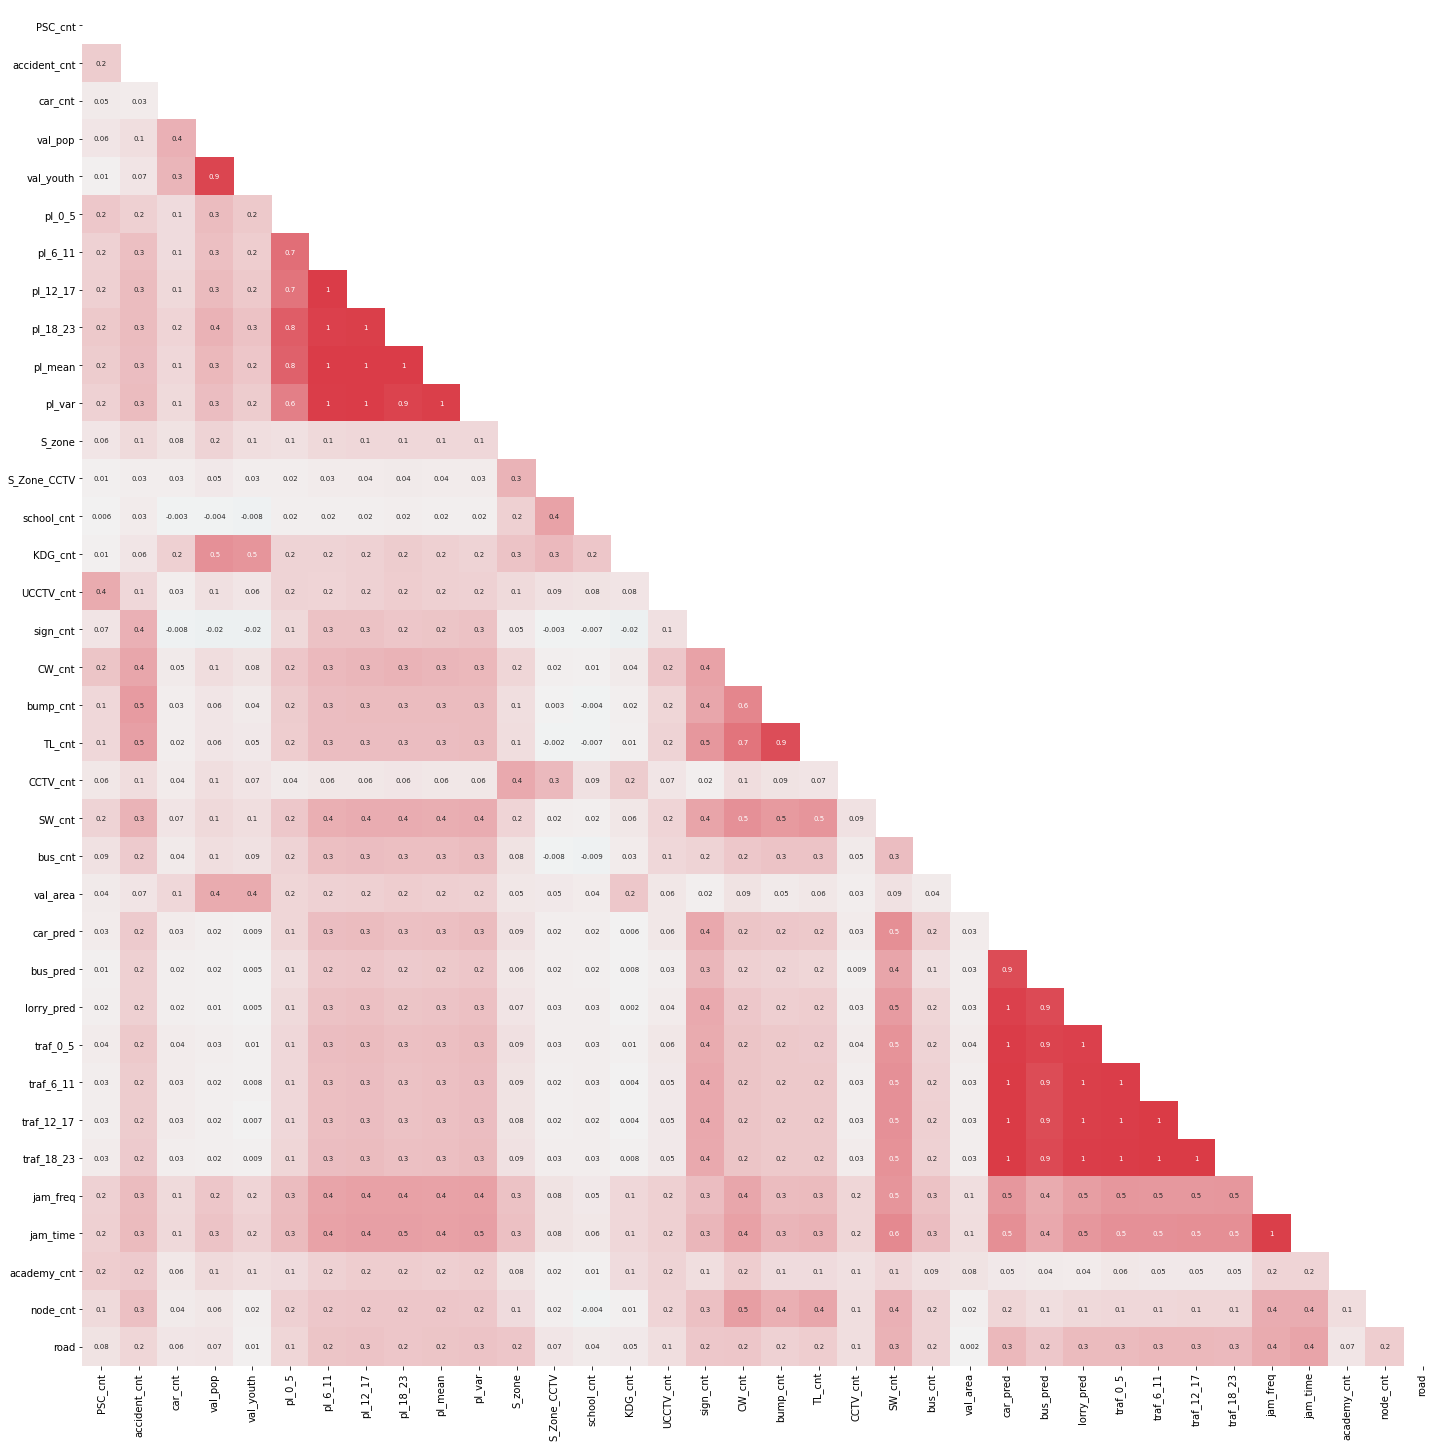

<Figure size 432x288 with 0 Axes>

In [184]:
## correlation plot 

# plot size 설정 
f, ax = plt.subplots(figsize=(25,25))

# upper matrix
matrix = np.triu(data_final.corr())
# palette 
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data_final.corr(),
                annot=True, annot_kws={"size": 7}, fmt ='.1g',
                center = 0, vmin=-1, vmax=1, 
                cmap = colormap, cbar = False, #cbar_kws= {'orientation': 'horizontal'} , 
                square = True, mask = matrix)
plt.show()
plt.savefig('correlation_plot.png')

- 시간대별 유동인구와 교통량 데이터의 상관관계가 너무 높아 다중공선성 문제가 발생할 위험이 있기 때문에 유동인구 데이터는 전체 시간대 평균과 분산만 사용하고, 교통량 데이터는 승용차, 버스, 화물차 추정 교통량의 합만을 사용하기로 결정하였습니다.

해석이 어려운 혼잡시간강도 변수와 건물연면적 변수 제거하고, CCTV 개수는 무인단속 cctv 와 방범 cctv 데이터의 개수 합을 기준으로 살피기 위해 어린이보호구역 데이터 내 cctv 개수는 삭제하였습니다.

In [185]:
# 저장한 데이터 불러오기 
final_data = pd.read_csv("final_data.csv")
final_dataset = gpd.read_file("final_dataset.geojson")

In [186]:
final_data = final_data.drop(['pl_0_5','pl_6_11','pl_12_17','pl_18_23',
                 'val_area','traf_0_5','traf_6_11','traf_12_17','traf_18_23',
                 'jam_time','S_Zone_CCTV'],axis=1)

In [187]:
## CCTV관련 변수 합치기
final_data['CCTV'] = final_data['UCCTV_cnt']+final_data['CCTV_cnt']

In [188]:
## 교통추정량 관련 변수 합치기
final_data['traf_pred'] = final_data['car_pred']+final_data['bus_pred']+final_data['lorry_pred']

학교를 포함한 어린이들이 사용하는 시설들 모두 합쳐 하나의 변수로 생성하고, 추후에 어린이보호구역 선정 시설에 사용할 예정입니다.

In [189]:
## 초등학교, 유치원, 학원 변수 합치기
final_data['school'] = final_data['school_cnt']+final_data['KDG_cnt']+final_data['academy_cnt']

In [190]:
final_data = final_data.drop(['UCCTV_cnt', 'CCTV_cnt', 'school_cnt', 'KDG_cnt', 'academy_cnt',
                'car_pred', 'bus_pred', 'lorry_pred'],axis=1)

도로가 있는 격자만 분석대상으로 삼기위해 데이터를 필터링하여 최종 데이터셋을 생성하였습니다.

In [191]:
##도로가 있는 것만 분석대상에 넣기
final_data = final_data[final_data['road']==1]

In [192]:
# csv 파일 저장 
final_data.to_csv('analysis1_data.csv', encoding='utf-8',index=False)

In [193]:
## geojson 파일로 저장
final_data = pd.merge(final_data, data_gid, on = 'gid', how = 'left')
final_data = gpd.GeoDataFrame(final_data, geometry='geometry')
final_data.to_file('analysis1_dataset.geojson', driver="GeoJSON",index=False)